<h1>Importando os Dados</h1>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

OldDataFrame = pd.read_csv('kc_house_data.csv', encoding='UTF-8', sep=";")
DataFrame = OldDataFrame.query('price <= 1000000')
DataFrame.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,"47,5112","-122,2570",1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,"47,7210","-122,3190",1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,"47,7379","-122,2330",2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,"47,5208","-122,3930",1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,"47,6168","-122,0450",1800,7503


<h3>A empresa, House Rocket, deseja obter infromações e o direcionamento de mercado de casas na cidade de King County, USA, para isto ela levantou as seguintes questões: </h3>
<h3> 
    <ol>
    <li>Quais casas o CEO da House Rocket deveria comprar e por qual preço de compra?</li>  <br>   
    <li>Uma vez a casa em posse da empresa, qual o melhor momento para vendê-las e qual seria o preço da venda?</li>   <br>  
    <li> A House Rocket deveria fazer uma reforma para aumentar o preço da venda? Quais seriam as sugestões de mudanças? Qual o incremento no preço dado por cada opção de reforma?</li>       
    </ol>
</h3>

<h6>Informações</h6>

sqft_basement = tamanho do porão

sqft_above = tamanho segundo andar

yr_built = ano de construção

yr_renovated = ano da reforma

# Observando casas reformadas para calcular sua valorização

In [4]:
Renovated = DataFrame[DataFrame['yr_renovated']!=0]
Unrenovated = DataFrame[DataFrame['yr_renovated']==0]

In [5]:
DataFrame.loc[:,:]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,"47,5112","-122,2570",1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,"47,7210","-122,3190",1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,"47,7379","-122,2330",2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,"47,5208","-122,3930",1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,"47,6168","-122,0450",1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,"47,6993","-122,3460",1530,1509
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,"47,5107","-122,3620",1830,7200
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,"47,5944","-122,2990",1020,2007
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,"47,5345","-122,0690",1410,1287


Text(0, 0.5, 'Preço em 10 Bilhões')

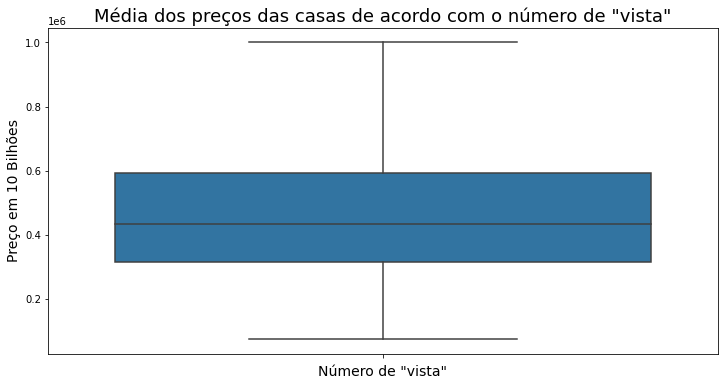

In [7]:
ax = sns.boxplot(y = DataFrame.price)

ax.figure.set_size_inches(12, 6)
ax.set_title('Média dos preços das casas de acordo com o número de "vista"', fontsize=18)
ax.set_xlabel('Número de "vista"', fontsize=14)
ax.set_ylabel('Preço em 10 Bilhões', fontsize=14)

Text(0, 0.5, 'Preço em 10 Bilhões')

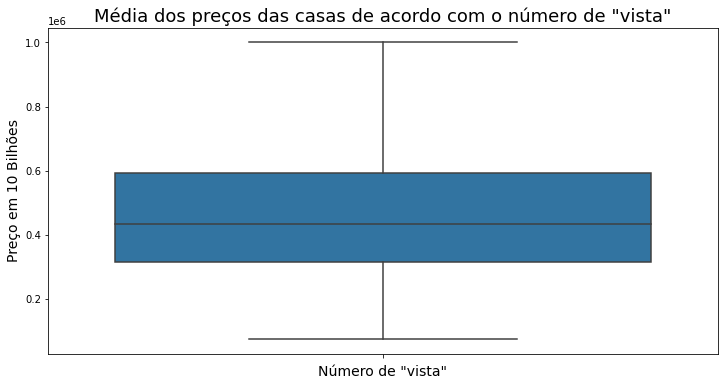

In [8]:
ax = sns.boxplot(y = DataFrame.query('price < 1000000').price)

ax.figure.set_size_inches(12, 6)
ax.set_title('Média dos preços das casas de acordo com o número de "vista"', fontsize=18)
ax.set_xlabel('Número de "vista"', fontsize=14)
ax.set_ylabel('Preço em 10 Bilhões', fontsize=14)

<h1>Dado os boxplots, é notada a presença de diversos outliers que distorcem as informações. Sendo assim, o projeto será refatorado dividindo as bases em duas bases de dados, Casas e Casas de Luxo.</h1>

In [9]:
DataFrame.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,"47,5112","-122,2570",1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,"47,7210","-122,3190",1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,"47,7379","-122,2330",2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,"47,5208","-122,3930",1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,"47,6168","-122,0450",1800,7503


In [12]:
lista_drop = ['id', 'price', 'date', 'sqft_living', 'sqft_above','sqft_lot', 'lat', 'long','sqft_living15', 'sqft_lot15',\
              'sqft_basement', 'zipcode', 'yr_built']
df = DataFrame.drop(lista_drop, axis = 1) # valores para classificação
filt = []
filt = df['yr_renovated'] != 0
df['Renovated'] = filt
df.drop(['yr_renovated'], axis = 1,inplace = True)
df

,bedrooms,bathrooms,floors,waterfront,view,condition,grade,Renovated
0,3,1.00,1.0,0,0,3,7,False
1,3,2.25,2.0,0,0,3,7,True
2,2,1.00,1.0,0,0,3,6,False
3,4,3.00,1.0,0,0,5,7,False
4,3,2.00,1.0,0,0,3,8,False
...,...,...,...,...,...,...,...,...
21608,3,2.50,3.0,0,0,3,8,False
21609,4,2.50,2.0,0,0,3,8,False
21610,2,0.75,2.0,0,0,3,7,False
21611,3,2.50,2.0,0,0,3,8,False


In [13]:
df.Renovated.value_counts()

False    19412
True       736
Name: Renovated, dtype: int64

In [14]:
Price = DataFrame.price # Preço

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.utils.multiclass import type_of_target
X_train, X_test, y_train, y_test = \
  train_test_split(df,
                   Price,
                   test_size=0.33, 
                   random_state=42)
X_train

,bedrooms,bathrooms,floors,waterfront,view,condition,grade,Renovated
1814,3,2.50,1.0,0,0,3,8,False
8037,5,1.50,1.5,0,0,3,8,False
6789,3,2.00,1.0,0,0,3,8,False
4005,3,1.75,1.0,0,0,4,7,False
18160,4,2.00,1.0,0,0,3,7,False
...,...,...,...,...,...,...,...,...
12068,4,2.00,1.0,0,0,5,8,False
12791,2,1.00,1.0,0,0,3,7,False
5767,4,2.00,1.5,0,0,4,8,False
920,3,2.00,1.0,0,0,3,7,False


In [16]:
from sklearn.neural_network import MLPClassifier
MLPC = MLPClassifier()
MLPC.fit(X_train, y_train)
MLPC_stats = MLPC.score(X_test, y_test)
print(MLPC_stats)
resolutionMLPC = MLPC.predict(X_test)
resMLPC = pd.DataFrame(resolutionMLPC, index = X_test.index.tolist())
dfrealresMLPC = pd.DataFrame(y_test)
resultMLPC = pd.concat([dfrealresMLPC, resMLPC], axis=1, ignore_index=True)
#a= np.array(resultMLPC[1]).tolist()
#print(a[:420])
resultMLPC = resultMLPC.sort_values(by= 0, ascending=True)
resultMLPC = resultMLPC.rename(columns = {0: 'Nota_Enem', 1: 'Nota_ML'}, inplace = False)
botTopML = resultMLPC.sort_values(by= 'Nota_ML', ascending=True)
print(resultMLPC)#bot 5 e top 5 pela nota do enem
print(botTopML)#bot 5 e top 5 pelo machine learning

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.006316739359302151
       Nota_Enem   Nota_ML
1149     75000.0   90000.0
8274     82000.0  210000.0
5866     89000.0  230000.0
3108     89950.0  279200.0
10770    92000.0   90000.0
...          ...       ...
5689   1000000.0  809000.0
2653   1000000.0  788000.0
15431  1000000.0  834500.0
4959   1000000.0  784000.0
3252   1000000.0  835000.0

[6649 rows x 2 columns]
       Nota_Enem    Nota_ML
13628   105500.0    81000.0
16619   338500.0    82500.0
9549    275000.0    82500.0
1149     75000.0    90000.0
4290    192950.0    90000.0
...          ...        ...
2405    603000.0   999950.0
15211   915000.0   999950.0
15006   535000.0  1000000.0
13464   790000.0  1000000.0
8469    695000.0  1000000.0

[6649 rows x 2 columns]


In [17]:
abs(botTopML.diff(axis = 1).Nota_ML).mean()

145895.728229809

In [18]:
abs(botTopML.diff(axis = 1).Nota_ML).std()

121951.56527017093

In [19]:
abs(botTopML.diff(axis = 1).Nota_ML).median()

119999.0

In [20]:
botTopML.head(1000)

,Nota_Enem,Nota_ML
13628,105500.0,81000.0
16619,338500.0,82500.0
9549,275000.0,82500.0
1149,75000.0,90000.0
4290,192950.0,90000.0
...,...,...
10141,252000.0,249000.0
15113,370000.0,249000.0
3435,279000.0,249000.0
16833,465000.0,249000.0


In [21]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(max_iter=1000)
LR.fit(X_train, y_train)
LR_stats = LR.score(X_test, y_test)
print(LR_stats)
resolutionLR = LR.predict(X_test)
resLR = pd.DataFrame(resolutionLR, index = X_test.index.tolist())
dfresLR = pd.DataFrame(y_test)
resultLR = pd.concat([dfresLR, resLR], axis=1, ignore_index=True)
resultLR = resultLR.sort_values(by= 0, ascending=True)
resultLR = resultLR.rename(columns = {0: 'OriginalPrice', 1: 'MLPrice'}, inplace = False)
botTopMLLR = resultLR.sort_values(by= 'MLPrice', ascending=True)
print(resultLR)#bot 5 e top 5 pela nota do enem
print(botTopMLLR)#bot 5 e top 5 pelo machine learning

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.009775906151300948
       OriginalPrice   MLPrice
1149         75000.0  175000.0
8274         82000.0  250000.0
5866         89000.0  230000.0
3108         89950.0  190000.0
10770        92000.0  250000.0
...              ...       ...
5689       1000000.0  650000.0
2653       1000000.0  800000.0
15431      1000000.0  649000.0
4959       1000000.0  850000.0
3252       1000000.0  995000.0

[6649 rows x 2 columns]
       OriginalPrice    MLPrice
15712       150000.0   120000.0
15540       135000.0   160000.0
9831        204950.0   170000.0
10481       484000.0   170000.0
11674       255000.0   170000.0
...              ...        ...
13907       925000.0   995000.0
9325        960000.0   995000.0
3615        870000.0   995000.0
3252       1000000.0   995000.0
16171       960000.0  1000000.0

[6649 rows x 2 columns]


In [22]:
abs(botTopMLLR.diff(axis = 1).MLPrice).mean()

124859.95518123027

In [23]:
abs(botTopMLLR.diff(axis = 1).MLPrice).std()

100245.20356897324

In [24]:
abs(botTopMLLR.diff(axis = 1).MLPrice).median()

101000.0

In [25]:
botTopMLLR.head(15)

,OriginalPrice,MLPrice
15712,150000.0,120000.0
15540,135000.0,160000.0
9831,204950.0,170000.0
10481,484000.0,170000.0
11674,255000.0,170000.0
1149,75000.0,175000.0
19121,182000.0,175000.0
17603,124000.0,175000.0
15131,135000.0,175000.0
3629,510000.0,175000.0


In [26]:
botTopMLLR

,OriginalPrice,MLPrice
15712,150000.0,120000.0
15540,135000.0,160000.0
9831,204950.0,170000.0
10481,484000.0,170000.0
11674,255000.0,170000.0
...,...,...
13907,925000.0,995000.0
9325,960000.0,995000.0
3615,870000.0,995000.0
3252,1000000.0,995000.0


In [27]:
botTopML

,Nota_Enem,Nota_ML
13628,105500.0,81000.0
16619,338500.0,82500.0
9549,275000.0,82500.0
1149,75000.0,90000.0
4290,192950.0,90000.0
...,...,...
2405,603000.0,999950.0
15211,915000.0,999950.0
15006,535000.0,1000000.0
13464,790000.0,1000000.0


In [28]:
df

,bedrooms,bathrooms,floors,waterfront,view,condition,grade,Renovated
0,3,1.00,1.0,0,0,3,7,False
1,3,2.25,2.0,0,0,3,7,True
2,2,1.00,1.0,0,0,3,6,False
3,4,3.00,1.0,0,0,5,7,False
4,3,2.00,1.0,0,0,3,8,False
...,...,...,...,...,...,...,...,...
21608,3,2.50,3.0,0,0,3,8,False
21609,4,2.50,2.0,0,0,3,8,False
21610,2,0.75,2.0,0,0,3,7,False
21611,3,2.50,2.0,0,0,3,8,False


In [29]:
quartos = []
for quarto in df.bedrooms.unique():
    quartos.append(quarto)
quartos

[3, 2, 4, 5, 1, 6, 7, 8, 0, 9, 11, 10, 33]

In [30]:
banheiros = []
for banheiro in df.bathrooms.unique():
    banheiros.append(banheiro)
banheiros

[1.0,
 2.25,
 3.0,
 2.0,
 1.5,
 2.5,
 1.75,
 2.75,
 3.25,
 4.0,
 3.5,
 0.75,
 4.25,
 1.25,
 4.5,
 3.75,
 0.0,
 4.75,
 5.0,
 0.5,
 6.75,
 5.25,
 7.5,
 5.5,
 5.75,
 6.0]

In [31]:
andares = []
for andar in df.floors.unique():
    andares.append(andar)
andares

[1.0, 2.0, 1.5, 3.0, 2.5, 3.5]

In [32]:
fontes = []
for fonte in df.waterfront.unique():
    fontes.append(fonte)
fontes

[0, 1]

In [33]:
vistas = []
for vista in df.view.unique():
    vistas.append(vista)
vistas

[0, 3, 4, 2, 1]

In [34]:
condicoes = []
for condicao in df.condition.unique():
    condicoes.append(condicao)
condicoes

[3, 5, 4, 1, 2]

In [35]:
avaliacoes = []
for avaliacao in df.grade.unique():
    avaliacoes.append(avaliacao)
avaliacoes

[7, 6, 8, 9, 5, 10, 4, 11, 3, 12, 1]

In [36]:
reformadas = []
for reformada in df.Renovated.unique():
    reformadas.append(reformada)
reformadas

[False, True]

In [37]:
dcnr = {'quartos' : quartos, 'banheiros' : banheiros, 'andares' : andares, 'fontes': fontes, 'vistas' : vistas, 
        'condicoes' : condicoes, 'avaliacoes' : avaliacoes, 'reformadas' : reformadas}
dcnr

{'quartos': [3, 2, 4, 5, 1, 6, 7, 8, 0, 9, 11, 10, 33],
 'banheiros': [1.0,
  2.25,
  3.0,
  2.0,
  1.5,
  2.5,
  1.75,
  2.75,
  3.25,
  4.0,
  3.5,
  0.75,
  4.25,
  1.25,
  4.5,
  3.75,
  0.0,
  4.75,
  5.0,
  0.5,
  6.75,
  5.25,
  7.5,
  5.5,
  5.75,
  6.0],
 'andares': [1.0, 2.0, 1.5, 3.0, 2.5, 3.5],
 'fontes': [0, 1],
 'vistas': [0, 3, 4, 2, 1],
 'condicoes': [3, 5, 4, 1, 2],
 'avaliacoes': [7, 6, 8, 9, 5, 10, 4, 11, 3, 12, 1],
 'reformadas': [False, True]}

In [38]:

for item in dcnr:
    print(dcnr[item][0])

3
1.0
1.0
0
0
3
7
False


In [39]:
arr = np.array([[3,1.0,1.0,0,0,3,7,False]])
pred = pd.DataFrame(arr, columns = ['bedrooms','bathrooms','floors', 'waterfront', 'view', 'condition', 'grade','Renovated'])

In [40]:
MLPC.predict(pred)

array([450000.])

In [41]:
cesta_frutas = {'pera':[10,5], 'uva':[2, 8], 'maça':55, 'abacaxi':25, 'laranja':15}
print(cesta_frutas)

{'pera': [10, 5], 'uva': [2, 8], 'maça': 55, 'abacaxi': 25, 'laranja': 15}


In [42]:
for fruta, qtd in cesta_frutas.items():
    print(fruta +": "+str(qtd))

pera: [10, 5]
uva: [2, 8]
maça: 55
abacaxi: 25
laranja: 15


In [ ]:
newarr = []
np.array(newarr)
i = 0
for quartos in dcnr['quartos']:
        for bath in dcnr['banheiros']:
            for floors in dcnr['andares']:
                for fontes in dcnr['fontes']:
                    for view in dcnr['vistas']:
                        for condition in dcnr['condicoes']:
                            for grade in dcnr['avaliacoes']:
                                for  renew_val in dcnr['reformadas']:
                                    arr = np.array([[quartos, bath, floors, fontes, view, condition, grade, renew_val]])
                                    pred = pd.DataFrame(arr, columns = ['bedrooms','bathrooms','floors', 'waterfront', 'view', 'condition', 'grade','Renovated'])
                                    np.append(newarr, np.array(MLPC.predict(pred)))
        print(len(dcnr['quartos']) - i)
        i += 1

In [46]:
newarr

array([], dtype=float64)